In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('House_Train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df1 = df.copy(deep=True)
df1.drop(['Id'],axis=1, inplace=True)
df1.shape

(1460, 80)

In [5]:
80*80

6400

In [6]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 37 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [7]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
df1[numerical].nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [9]:
df1[numerical].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

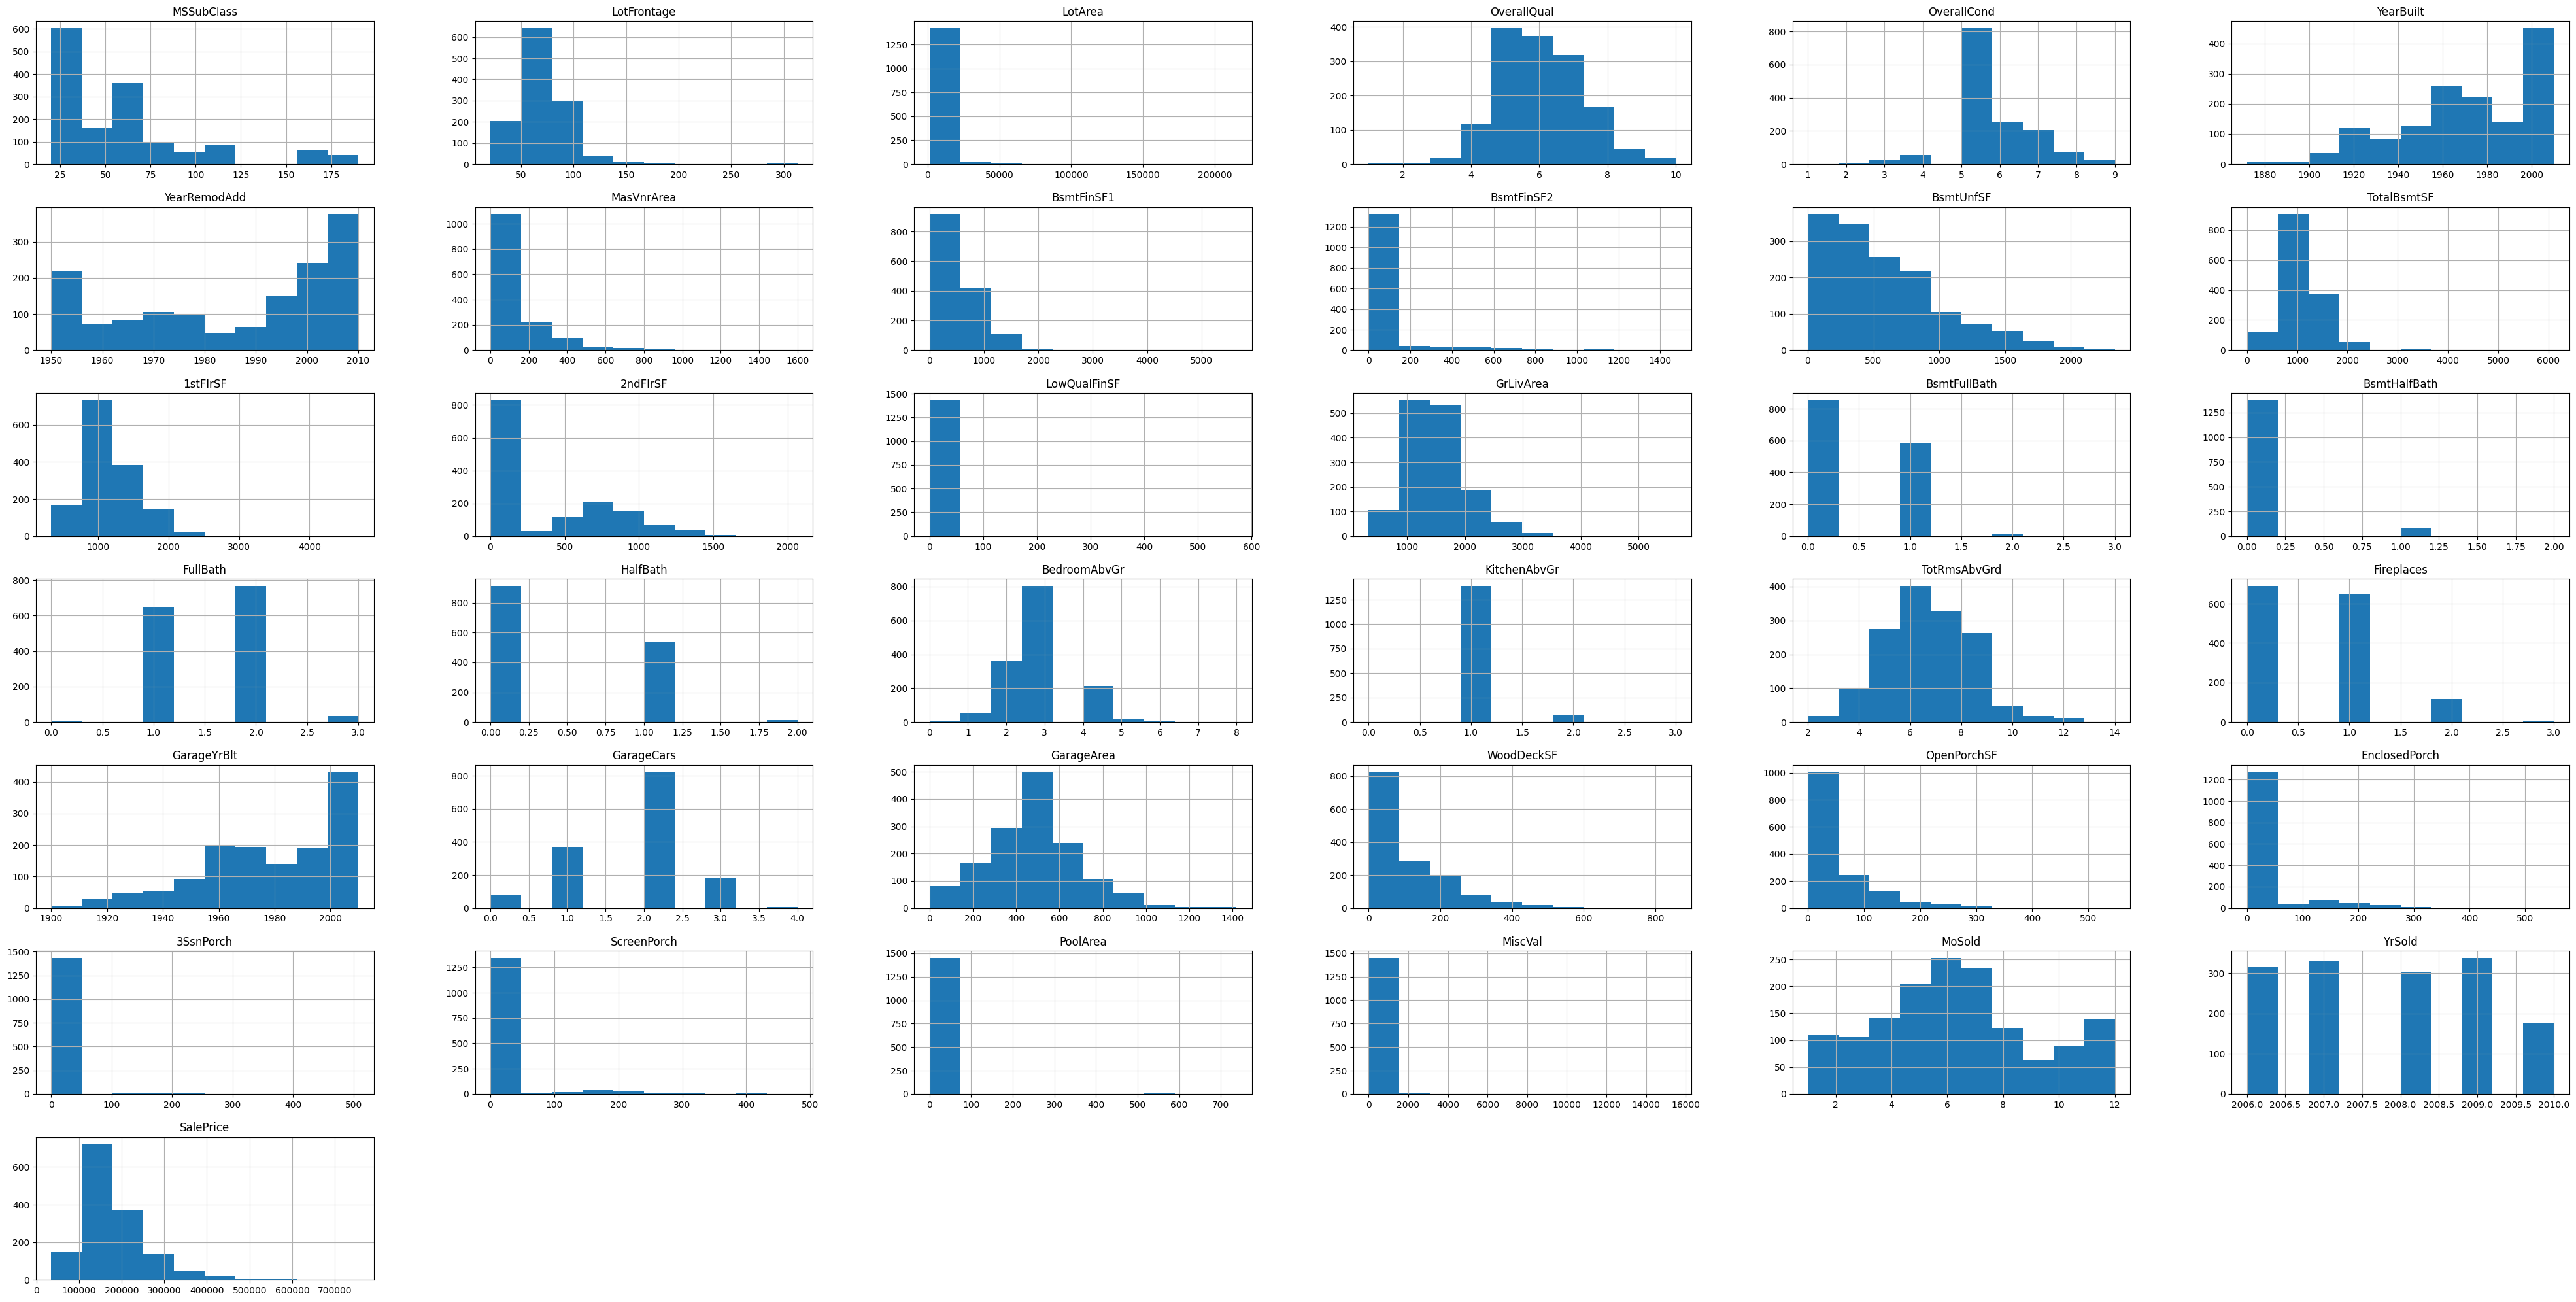

In [10]:
df1[numerical].hist(figsize=(50,25))

Lot -> Median
GarageYrBlt -> Mode

In [11]:
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)

In [12]:
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mode().iloc[0],inplace=True)

In [13]:
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(),inplace=True)

In [14]:
df1[numerical].isnull().values.any()

False

In [15]:
df1[categorical].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [16]:
df1[categorical] = df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [17]:
df1[categorical].isnull().values.any()

False

In [18]:
df1.shape

(1460, 80)

In [19]:
df1['YearBuilt'] = pd.to_datetime(df1['YearBuilt'],format='%Y')
df1['YearRemodAdd']= pd.to_datetime(df1['YearRemodAdd'],format='%Y')
df1['YrSold']= pd.to_datetime(df1['YrSold'],format='%Y')
df1['GarageYrBlt']= pd.to_datetime(df1['GarageYrBlt'],format='%Y')

In [20]:
df1 = df1.assign(
    yr_blt = df1['YearBuilt'].dt.year,
    yr_remod = df1['YearRemodAdd'].dt.year,
    yr_sold = df1['YrSold'].dt.year,
    yr_garage = df1['GarageYrBlt'].dt.year,
)
df1.shape

(1460, 84)

In [21]:
df1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

In [22]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 37 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'yr_blt', 'yr_remod', 'yr_sold', 'yr_garage']


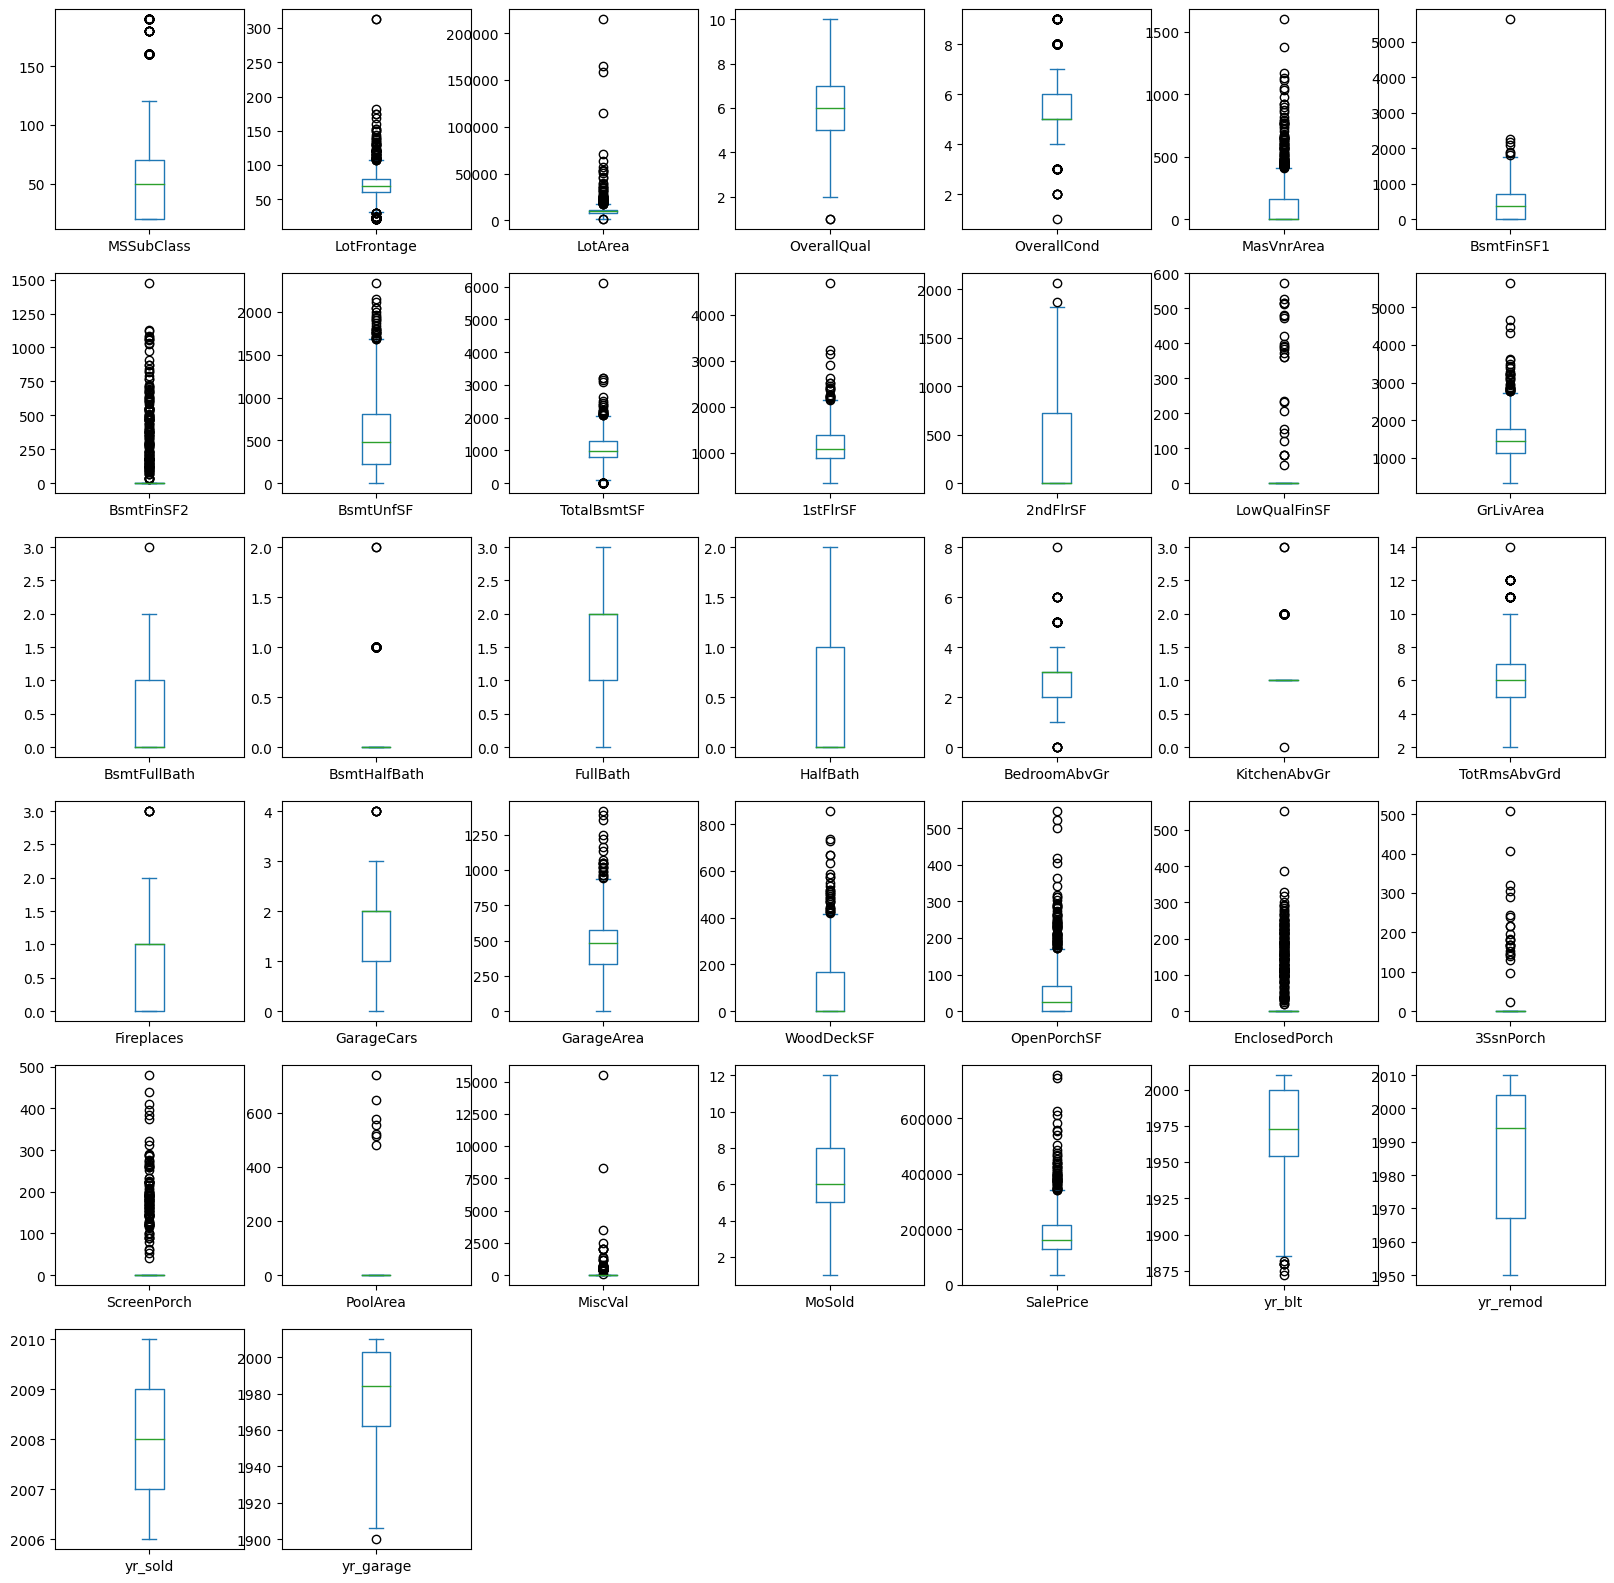

In [23]:
df1[numerical].plot(kind = "box",subplots = True,layout = (6,7),figsize=(20,20)) #Boxplot to check the outliers
plt.show()

Outliers
SalePrice
MiscVal
OpenPorchSF
WooddeckSF
garageArea
bedroomabvgr
grlivearea
2ndfloorfl
1stflrsf
totalbsmtsf
bsmtunfsf
bsmtfinsf1
masvnr
overallcodn
lot frontage
ms sub class





In [24]:
rem_list = ['SalePrice','MiscVal','GarageArea',
 'WoodDeckSF',
 'OpenPorchSF','BedroomAbvGr', 'GrLivArea', '1stFlrSF',
 '2ndFlrSF','MSSubClass',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',]

In [25]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [26]:
df2 = treat_outliers_all(df1 , rem_list)

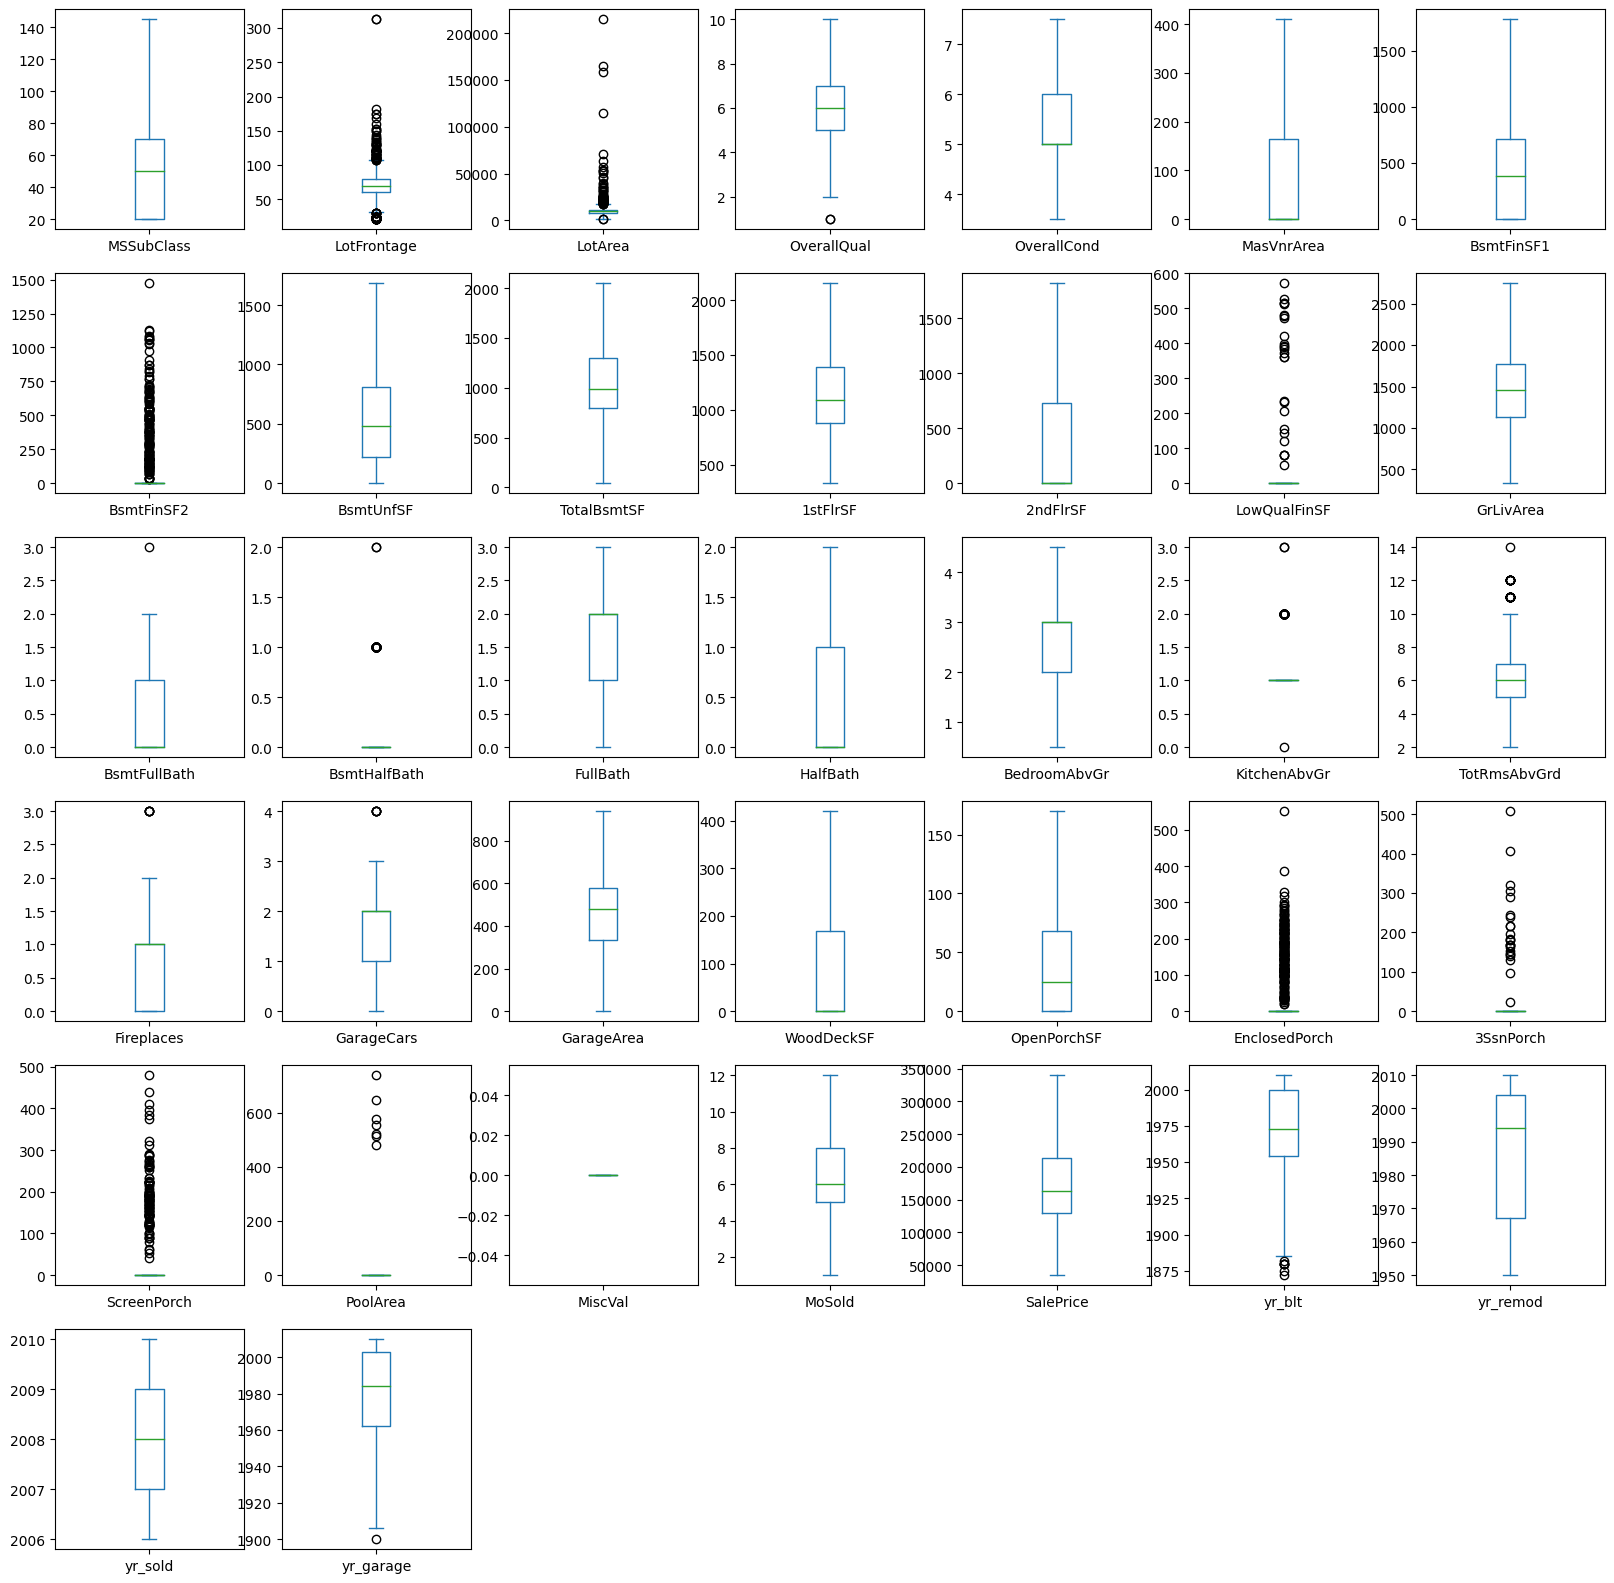

In [27]:
df2[numerical].plot(kind = "box",subplots = True,layout = (6,7),figsize=(20,20)) #Boxplot to check the outliers
plt.show()

Encoding

In [28]:
df3 = pd.get_dummies(data = df2, columns=categorical, drop_first=True)
df3.shape

(1460, 246)

Feature Engineering

In [29]:
X = df3.drop(['SalePrice'],axis=1)
y = df3.SalePrice

X.shape, y.shape

((1460, 245), (1460,))

In [30]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 245), (292, 245), (1168,), (292,))

In [31]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [33]:
y_pred_lin = reg.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 15553.871
Root Mean Square Error: 27591.06
R2 Score: 0.844


Random Forests

In [35]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [36]:
X_train_RF.shape, X_test_RF.shape

((1168, 245), (292, 245))

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [38]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
y_pred_RF = rf.predict(X_test_RF)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 16861.985
Root Mean Square Error: 23157.205
R2 Score: 0.89


With 100 trees

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 14965.992
Root Mean Square Error: 20872.562
R2 Score: 0.911


RF gridsearch

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestRegressor(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [45]:
y_pred_RF_cv = clf.predict(X_test_RF)
# print(y_pred_RF_100)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rfcv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rfcv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
r_sq_rfcv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rfcv,3),round(rmse_rfcv,3),round(r_sq_rfcv,3)))

Mean Absolute Error: 14929.278
Root Mean Square Error: 20597.767
R2 Score: 0.913


ANN

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [48]:
rent_model = Sequential()
rent_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dropout(0.2))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(256, activation = "relu"))
rent_model.add(Flatten())
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
rent_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               62976     
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [49]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
rent_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [50]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [51]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='rent_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [52]:
history=rent_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/8 [==>...........................] - ETA: 13s - loss: 170872.9375 - mean_absolute_error: 170872.9062
Epoch 1: val_loss improved from inf to 177695.82812, saving model to rent_model.h5
8/8 [==============================] - 2s 33ms/step - loss: 177931.2188 - mean_absolute_error: 177931.2031 - val_loss: 177695.8281 - val_mean_absolute_error: 177695.7969
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 173395.0000 - mean_absolute_error: 173394.9688
Epoch 2: val_loss improved from 177695.82812 to 64497.72656, saving model to rent_model.h5
8/8 [==============================] - 0s 14ms/step - loss: 152608.4844 - mean_absolute_error: 152608.4688 - val_loss: 64497.7266 - val_mean_absolute_error: 64497.6953
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 65627.7812 - mean_absolute_error: 65627.7500
Epoch 3: val_loss improved from 64497.72656 to 50737.95312, saving model to rent_model.h5
8/8 [==============================] - 0s 14ms/step - loss: 66238.257

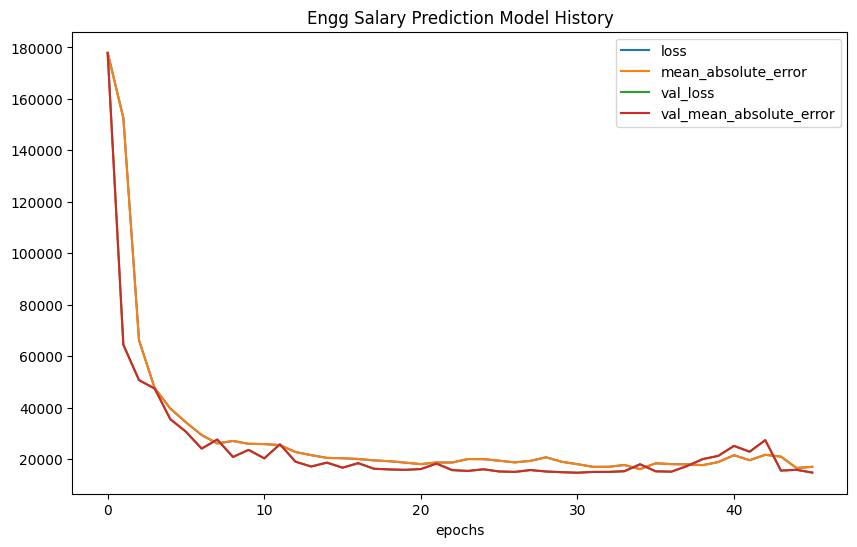

In [53]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [54]:
y_pred_cnn = rent_model.predict(X_test_RF)
# print(y_pred_cnn)

10/10 [==============================] - 0s 1ms/step


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 16309.254
Root Mean Square Error: 23362.3
R2 Score: 0.888


In [56]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
rf_cv_results = pd.Series({ "MAE": mae_rfcv, "RMSE": rmse_rfcv, "R-Square": r_sq_rfcv }, name="Random Forest-CV")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results,rf_cv_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,15553.871,27591.060,0.844
Random Forest-10,16861.985,23157.205,0.890
Random Forest-100,14965.992,20872.562,0.911
Random Forest-CV,14929.278,20597.767,0.913
CNN,16309.254,23362.300,0.888


Test data

In [89]:
test_df = pd.read_csv('House_Test.csv')
test_df.shape

(1459, 80)

In [90]:
test_df1 = test_df.copy(deep=True)
test_df1.drop(['Id'],axis=1, inplace=True)
test_df1.shape

(1459, 79)

In [91]:
categorical = [var for var in test_df1.columns if test_df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)


There are 43 categorical variables

The categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [92]:
numerical = [var for var in test_df1.columns if test_df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 36 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [93]:
test_df1[numerical].isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [94]:
df1 = df.copy(deep=True)
df1.drop(['Id'],axis=1, inplace=True)
df1.shape

(1460, 80)

In [95]:
test_df1[numerical] = test_df1[numerical].fillna(df1[numerical].median())

In [96]:
test_df1[numerical].isnull().values.any()

False

In [97]:
test_df1[categorical]=test_df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [98]:
test_df1[categorical].isnull().values.any()

False

In [99]:
test_df1['YearBuilt'] = pd.to_datetime(test_df1['YearBuilt'],format='%Y')
test_df1['YearRemodAdd']= pd.to_datetime(test_df1['YearRemodAdd'],format='%Y')
test_df1['YrSold']= pd.to_datetime(test_df1['YrSold'],format='%Y')
test_df1['GarageYrBlt']= pd.to_datetime(test_df1['GarageYrBlt'],format='%Y')

In [100]:
test_df1 = test_df1.assign(
    yr_blt = test_df1['YearBuilt'].dt.year,
    yr_remod = test_df1['YearRemodAdd'].dt.year,
    yr_sold = test_df1['YrSold'].dt.year,
    yr_garage = test_df1['GarageYrBlt'].dt.year,
)
test_df1.shape

(1459, 83)

In [101]:
test_df1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

In [102]:
numerical = [var for var in test_df1.columns if test_df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 36 numerical variables

The numerical variables : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'yr_blt', 'yr_remod', 'yr_sold', 'yr_garage']


In [103]:
test_df1.shape

(1459, 79)

In [104]:
test_df3 = pd.get_dummies(data = test_df1, columns=categorical,drop_first=True)
test_df3.shape

(1459, 227)

In [105]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( test_df3.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_df3[c] = 0
# Ensure the order of column in the test_df3 set is in the same order than in train set
test_df3 = test_df3[X_train.columns]

In [106]:
test_df3.shape

(1459, 245)

In [111]:
test_df3_RF = scaler.fit_transform(test_df3)
test_df3_RF = pd.DataFrame(test_df3_RF,columns=cols)

In [112]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


RF_cv results

In [113]:
y_pred = clf.predict(test_df3_RF)

In [114]:
submission = pd.DataFrame(data={'id': sample.Id, 'SalePrice': y_pred})
submission.head()

,id,SalePrice
0,1461,112459.3820
1,1462,111155.7000
2,1463,131855.0220
3,1464,128973.6810
4,1465,188358.0655


In [115]:
submission.to_csv('RF_CV_submission.csv',index=False)